In [1]:
import gym

In [2]:
import gym_foster

In [98]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import tqdm as tqdm
import random

In [4]:
env = gym.make('foster-v0')

In [5]:
env.render()

The status of the youth is: in
The age of the youth is: 12
The race of the youth is: major
The casegoal of the youth is: Empty
Current reward is: 0


In [6]:
env.step('a_LTFC')

['LTFC', 13, 'major', 0.1, 'in']

In [7]:
env.render()

The status of the youth is: in
The age of the youth is: 13
The race of the youth is: major
The casegoal of the youth is: LTFC
Current reward is: 0


In [8]:
env.step('a_R')

['R', 14, 'major', 0, 'in']

In [9]:
env.render()

The status of the youth is: in
The age of the youth is: 14
The race of the youth is: major
The casegoal of the youth is: R
Current reward is: 0


In [10]:
env.step('a_R')

['R', 15, 'major', 0, 'in']

In [11]:
env.step('a_R')

['R', 16, 'major', 1, 'out']

In [139]:
env.reset()

In [124]:
def sample_trajectory(env,policy):
    ## policy is epsilon greey policy
    race = env.race
    age = env.age
    status = env.status
    epsion = 0.1 # probability to sample a random action
    trajectory = []
    while status == 'in':
        if np.random.binomial(1,epsion,1)[0] == 1:
            action = ['a_LTFC','a_R'][np.random.binomial(1,0.5,1)[0]]
        else:
            action = policy[(race,age)]
        next_ = env.step(action)
        reward = next_[3]
        trajectory.append(((race,age),action, reward))
        status = next_[4]
        age = next_[1]
    env.reset()
    return trajectory

In [218]:
'''
First version of model where reuntificaiton rates are constant. Rate_major = 0.5, rate_minor = 0.3, since the state is 
finate and generating samples are easilier than obtaining the distrbution in explicit form, monte carlo methods are
suitable for solving this problem. However, as the state becomes more and more 
complex, advancend methods need to be used to solve this problem. 
'''

## Sample a test group. 




## On-policy first-visit MC control  Check Sutton et al. page 99 for details. 
action_ = ['a_LTFC','a_R']
state_ = list(itertools.product(['major','minor'],[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]))
np.random.seed(1)
p = np.random.uniform(0,1,len(state_))
policy = dict(zip(state_,[random.sample(action_,1)[0] for i in range(len(state_))])) # sample a start policy. Is the probability to choose a_R
# theta_ = 0.1
gamma_ = 0.9 # discount factor
q_value_ = dict(zip(list(itertools.product(state_,action_)), np.random.uniform(0,1,len(state_ ) * 2 )))
# returns = dict(zip(list(itertools.product(state_,action_)),([] for _ in range(len(state_) * 2) ) ))
returns = dict(zip(list(itertools.product(state_,action_)), [0]* len(q_value_) ))
returns_count = dict(zip(list(itertools.product(state_,action_)), [0]* len(q_value_) ))
n = 0
history = []

while n< 100000: ## iterate 2000 times. 
    n += 1 
    trajectory = sample_trajectory(env,policy)
    G = 0
    trajectory.reverse()
    pair = set([(s,a) for s,a,r in trajectory])
#     returns = dict(zip(list(itertools.product(state_,['a_LTFC','a_R'])),([] for _ in range(len(state_) * 2) ) ))
    for index,(s,a,r) in enumerate(trajectory):
        G = G * gamma_ + r
        returns[(s,a)] += G
        returns_count[(s,a)] += 1
    for s,a in pair: 
        q_value_[(s,a)] = returns[(s,a)]/returns_count[(s,a)]
        if q_value_[(s,'a_LTFC')] > q_value_[(s,'a_R')]:
            policy[s] = 'a_LTFC'
        else:
            policy[s] = 'a_R'
    if n%100 == 0:
        history.append(list(q_value_.values()))
        
        
        

    

    
    












In [193]:
trajectory

[(('major', 13), 'a_R', 1)]

In [109]:
returns[(('major', 3), 'a_LTFC')].append(G)

In [166]:

trajectory = sample_trajectory(env,policy)
trajectory


[(('major', 13), 'a_R', 0),
 (('major', 14), 'a_LTFC', 0.1),
 (('major', 15), 'a_R', 1)]

In [131]:
policy = dict(zip(state_,[random.sample(action_,1)[0] for i in range(len(state_))]))

In [219]:
policy

{('major', 3): 'a_LTFC',
 ('major', 4): 'a_LTFC',
 ('major', 5): 'a_LTFC',
 ('major', 6): 'a_LTFC',
 ('major', 7): 'a_LTFC',
 ('major', 8): 'a_LTFC',
 ('major', 9): 'a_LTFC',
 ('major', 10): 'a_LTFC',
 ('major', 11): 'a_LTFC',
 ('major', 12): 'a_LTFC',
 ('major', 13): 'a_LTFC',
 ('major', 14): 'a_R',
 ('major', 15): 'a_R',
 ('major', 16): 'a_R',
 ('major', 17): 'a_R',
 ('major', 18): 'a_R',
 ('minor', 3): 'a_LTFC',
 ('minor', 4): 'a_LTFC',
 ('minor', 5): 'a_LTFC',
 ('minor', 6): 'a_LTFC',
 ('minor', 7): 'a_LTFC',
 ('minor', 8): 'a_LTFC',
 ('minor', 9): 'a_LTFC',
 ('minor', 10): 'a_LTFC',
 ('minor', 11): 'a_LTFC',
 ('minor', 12): 'a_LTFC',
 ('minor', 13): 'a_R',
 ('minor', 14): 'a_R',
 ('minor', 15): 'a_R',
 ('minor', 16): 'a_R',
 ('minor', 17): 'a_R',
 ('minor', 18): 'a_R'}

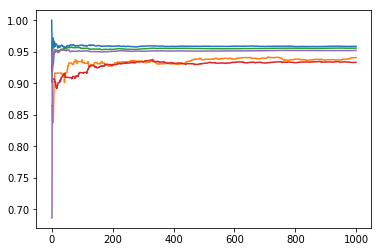

In [220]:
history = np.array(history)
for i in range(5):
    plt.plot(history[:,i])

In [18]:
## Sample a test population to check if policy improves over all reward and 
number = 10000

age_p = [0.05699999999999994,0.08,0.08,0.08,0.07,0.06,0.06,0.05,0.05,0.06,0.07,0.08,0.09,0.08,0.03,0.003]
age = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
age_sample = np.random.multinomial(1,age_p,10000)
self.age = age[np.where(age_sample == 1)[1][0]]
## Sample race of the youth
self.race = ['major','minor'][np.random.binomial(1,0.3,1)[0]]

NameError: name 'self' is not defined

In [ ]:
trajectory

In [ ]:
a = sample_trajectory(env,policy)

In [ ]:
a.reverse()


In [ ]:
0.81 * 0.9 + 0.1

In [99]:
import random

In [100]:
random.sample(action_,1)

['a_R']